In [1]:
import torch
import torch.nn as nn
from torch_geometric.loader import DataLoader
from networks import FractalNet, FractalNetShared, Net, GNN_no_rel, GNN
from subgraph import Graph_to_Subgraph
from train import train_model, get_qm9

In [3]:
# GLOBAL VARIABLES FOR THE EXPERIMENT
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs = 65
batch_size = 32
node_features = 5
# data related (x and y)
Z_ONE_HOT_DIM = 5
LABEL_INDEX = 7
EDGE_ATTR_DIM = 4
edge_features = 0
hidden_features = 64
out_features = 1

# TRAINING SHARED PARAMETERS FRACTAL NET

In [ ]:
model_name = 'FractalNetShared'
model = FractalNetShared(node_features,
                           edge_features,
                           hidden_features,
                           out_features,
                           depth=1,
                           pool='add').to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.7, patience=3, verbose=True)
train, valid, test = get_qm9("data/qm9",
                             device=device,
                             LABEL_INDEX = LABEL_INDEX,
                             transform=Graph_to_Subgraph())
train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid, batch_size=32, shuffle=False)
test_loader = DataLoader(test, batch_size=32, shuffle=False)

In [ ]:
fractalnetshared_results = train_model(model, model_name, epochs, train_loader, valid_loader, test_loader, optimizer, criterion, scheduler, device, LABEL_INDEX, Z_ONE_HOT_DIM)

# TRAINING A FRACTAL NET

In [7]:
model_name = 'FractalNet'
model = FractalNet(node_features,
                   edge_features,
                   hidden_features,
                   out_features,
                   depth=4,
                   pool='add',
                   add_residual_skip=False).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)
criterion = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.7, patience=3, verbose=True)
train, valid, test = get_qm9("data/qm9",
                             device=device,
                             LABEL_INDEX=LABEL_INDEX,
                             transform=Graph_to_Subgraph())
train_loader = DataLoader(train, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid, batch_size=32, shuffle=False)
test_loader = DataLoader(test, batch_size=32, shuffle=False)

In [8]:
fractalnet_results = train_model(model, model_name, epochs, train_loader, valid_loader, test_loader, optimizer, criterion, scheduler, device, LABEL_INDEX, Z_ONE_HOT_DIM)

Total number of parameters: 397761


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

TypeError: 'Tensor' object is not callable

# TRAINING SAME NET AS FRACTAL BUT WITHOUT SUBNODES

In [14]:
model_name = 'Net'
model = Net(node_features,
            edge_features,
            hidden_features*2,
            out_features,
            depth=4,
            pool='add').to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.7, patience=3, verbose=True)
train, valid, test = get_qm9("data/qm9",
                             device=device,
                             LABEL_INDEX=LABEL_INDEX,
                             transform=None)
train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid, batch_size=32, shuffle=False)
test_loader = DataLoader(test, batch_size=32, shuffle=False)

In [15]:
no_subnode_results = train_model(model, model_name, epochs, train_loader, valid_loader, test_loader, optimizer, criterion, scheduler, device, LABEL_INDEX, Z_ONE_HOT_DIM)

Total number of parameters: 396161


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 0, Loss: 0.38753036691188814, Valid Loss: 0.3481876834179647


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 1, Loss: 0.34152614776313306, Valid Loss: 0.337276571367781


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 2, Loss: 0.3345393597650528, Valid Loss: 0.3316594761924241


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 3, Loss: 0.328133248218298, Valid Loss: 0.32412406273733696


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 4, Loss: 0.32141775747060775, Valid Loss: 0.31922234968541147


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 5, Loss: 0.3158311916846037, Valid Loss: 0.3305546309287175


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 6, Loss: 0.3093298445492983, Valid Loss: 0.3066918281510996


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 7, Loss: 0.30298076366186144, Valid Loss: 0.31235768343693915


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 8, Loss: 0.2959343087214231, Valid Loss: 0.30242436864791206


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 9, Loss: 0.284519665800333, Valid Loss: 0.2843301127941464


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 10, Loss: 0.2552084039092064, Valid Loss: 0.27206759278576215


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 11, Loss: 0.2010173930287361, Valid Loss: 0.171996328729791


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 12, Loss: 0.14279916869044304, Valid Loss: 0.14329317136527822


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 13, Loss: 0.1092183601090312, Valid Loss: 0.1490664456765682


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 14, Loss: 0.08917293479919433, Valid Loss: 0.10974003634037682


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 15, Loss: 0.08037540216714144, Valid Loss: 0.06555015320321336


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 16, Loss: 0.07303581185907125, Valid Loss: 0.060341030455971015


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 17, Loss: 0.06561862208813429, Valid Loss: 0.052815434366714556


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 18, Loss: 0.05913112490832806, Valid Loss: 0.05343492176776496


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 19, Loss: 0.054169782914966345, Valid Loss: 0.077447554780938


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 20, Loss: 0.05299400879919529, Valid Loss: 0.05511553624508004


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch 00022: reducing learning rate of group 0 to 7.0000e-05.
Epoch: 21, Loss: 0.04778001911580563, Valid Loss: 0.06430400164422993


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 22, Loss: 0.03810094972774387, Valid Loss: 0.038556136397686534


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 23, Loss: 0.036266888355463746, Valid Loss: 0.03610548969750968


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 24, Loss: 0.03376018342860043, Valid Loss: 0.03521656954494385


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 25, Loss: 0.031549006671980025, Valid Loss: 0.03247152099879786


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 26, Loss: 0.03168610407635569, Valid Loss: 0.03265400920896389


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 27, Loss: 0.0318061106967926, Valid Loss: 0.03190032512354203


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 28, Loss: 0.029907432954758405, Valid Loss: 0.03007041548524564


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 29, Loss: 0.026326590405479074, Valid Loss: 0.027824660839762885


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 30, Loss: 0.026302285164371133, Valid Loss: 0.024661491839244914


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 31, Loss: 0.026468203289061784, Valid Loss: 0.0465472260781656


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 32, Loss: 0.02593835874285549, Valid Loss: 0.026286705477407184


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 33, Loss: 0.02491871453087777, Valid Loss: 0.023912909285227855


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 34, Loss: 0.02404324169963598, Valid Loss: 0.02562035236599894


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 35, Loss: 0.024219533626660704, Valid Loss: 0.02474079826941934


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 36, Loss: 0.022696326371282338, Valid Loss: 0.02480869761076027


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 37, Loss: 0.02184289810322225, Valid Loss: 0.02203752683585706


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 38, Loss: 0.021762876589857042, Valid Loss: 0.02044700247089798


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 39, Loss: 0.020438538720086215, Valid Loss: 0.020869868005605075


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 40, Loss: 0.01922231207460165, Valid Loss: 0.021644480261630333


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 41, Loss: 0.020467490967437624, Valid Loss: 0.021976196616233443


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 42, Loss: 0.018218671037591994, Valid Loss: 0.018955819912778494


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 43, Loss: 0.01786939918708056, Valid Loss: 0.021634520160944793


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 44, Loss: 0.018403764974996448, Valid Loss: 0.02470227538908537


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 45, Loss: 0.01694347275108099, Valid Loss: 0.01938693934513


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch 00047: reducing learning rate of group 0 to 4.9000e-05.
Epoch: 46, Loss: 0.01922388426758349, Valid Loss: 0.024464389095053125


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 47, Loss: 0.013783745786566288, Valid Loss: 0.018824411215433202


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 48, Loss: 0.013298235258422792, Valid Loss: 0.016831761535135107


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 49, Loss: 0.013045621567554773, Valid Loss: 0.0188650565687567


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 50, Loss: 0.012705483514219523, Valid Loss: 0.015309398105671517


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 51, Loss: 0.012869928562194108, Valid Loss: 0.013523394815451183


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 52, Loss: 0.01239468233520165, Valid Loss: 0.015266258804017482


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 53, Loss: 0.0121986947799474, Valid Loss: 0.016806474603792896


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 54, Loss: 0.011713470068834723, Valid Loss: 0.0160682886889496


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch 00056: reducing learning rate of group 0 to 3.4300e-05.
Epoch: 55, Loss: 0.012250777392424642, Valid Loss: 0.01798019207903919


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 56, Loss: 0.010310975695680827, Valid Loss: 0.013748082897280708


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 57, Loss: 0.00985843459402211, Valid Loss: 0.012004362759939113


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 58, Loss: 0.00977990334359929, Valid Loss: 0.01291794101923359


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 59, Loss: 0.009933021020237357, Valid Loss: 0.011979288514740706


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 60, Loss: 0.0095503907831572, Valid Loss: 0.01715183911693339


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 61, Loss: 0.009728539916258305, Valid Loss: 0.012453995663270996


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 62, Loss: 0.009628858979251236, Valid Loss: 0.01750347150799137


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch 00064: reducing learning rate of group 0 to 2.4010e-05.
Epoch: 63, Loss: 0.009335751747898758, Valid Loss: 0.013917182593014294


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

Epoch: 64, Loss: 0.008291105574816465, Valid Loss: 0.01214762462991864


  0%|          | 0/651 [00:00<?, ?it/s]

Test Loss: 0.012733982041007489


# TRAINING A NORMAL GNN WITH NO RELATIONAL INFO NET

In [4]:
model_name = 'GNN_no_rel'
model = GNN_no_rel(5, edge_features, hidden_features, out_features, num_convolution_blocks=3, pooling='add').to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
criterion = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.7, patience=3, verbose=True)
train, valid, test = get_qm9("data/qm9 ",
                             device=device,
                             LABEL_INDEX=LABEL_INDEX,
                             transform=None)
train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid, batch_size=32, shuffle=False)
test_loader = DataLoader(test, batch_size=32, shuffle=False)

/home/tin/Documents/Github/FractalMessagePassing/train.py:28: UserWarning: Using non-standard permutation since permute.pt does not exist.
  warn("Using non-standard permutation since permute.pt does not exist.")
/home/tin/anaconda3/envs/AudioSeparation/lib/python3.10/site-packages/torch_geometric/data/in_memory_dataset.py:157: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. The given 'InMemoryDataset' only references a subset of examples of the full dataset, but 'data' will contain information of the full dataset. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


In [5]:
gnn_no_rel_results = train_model(model, model_name, epochs, train_loader, valid_loader, test_loader, optimizer, criterion, scheduler, device, LABEL_INDEX, Z_ONE_HOT_DIM)

Total number of parameters: 277057


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

out type: torch.cuda.FloatTensor
loss type: torch.cuda.FloatTensor
out type: torch.cuda.FloatTensor
loss type: torch.cuda.FloatTensor
out type: torch.cuda.FloatTensor
loss type: torch.cuda.FloatTensor
out type: torch.cuda.FloatTensor
loss type: torch.cuda.FloatTensor
out type: torch.cuda.FloatTensor
loss type: torch.cuda.FloatTensor
out type: torch.cuda.FloatTensor
loss type: torch.cuda.FloatTensor
out type: torch.cuda.FloatTensor
loss type: torch.cuda.FloatTensor
out type: torch.cuda.FloatTensor
loss type: torch.cuda.FloatTensor
out type: torch.cuda.FloatTensor
loss type: torch.cuda.FloatTensor
out type: torch.cuda.FloatTensor
loss type: torch.cuda.FloatTensor
out type: torch.cuda.FloatTensor
loss type: torch.cuda.FloatTensor
out type: torch.cuda.FloatTensor
loss type: torch.cuda.FloatTensor
out type: torch.cuda.FloatTensor
loss type: torch.cuda.FloatTensor
out type: torch.cuda.FloatTensor
loss type: torch.cuda.FloatTensor
out type: torch.cuda.FloatTensor
loss type: torch.cuda.FloatTe

KeyboardInterrupt: 

# TRAINING A GNN WITH EDGE FEATURES

In [6]:
# create a fractal net and train it
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_name = 'GNN'
model = GNN(n_node_features = Z_ONE_HOT_DIM,
            n_edge_features=EDGE_ATTR_DIM,
            n_hidden=64,
            n_output=out_features,
            num_convolution_blocks=2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.7, patience=3, verbose=True)
train, valid, test = get_qm9("data/qm9",
                             device=device,
                             LABEL_INDEX=LABEL_INDEX,
                             transform=None)
train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid, batch_size=32, shuffle=False)

In [7]:
gnn_results = train_model(model, model_name, epochs, train_loader, valid_loader, test_loader, optimizer, criterion, scheduler, device, LABEL_INDEX, Z_ONE_HOT_DIM)

Total number of parameters: 227329


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

IndexError: too many indices for tensor of dimension 2

# PLOTTING LOSS

NameError: name 'gnn_results' is not defined

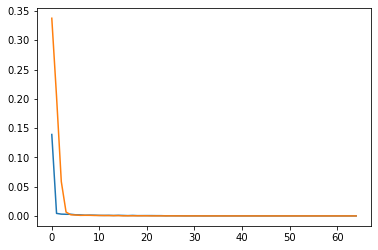

In [23]:
# plot loss
# IGNORE FOR NOW #
import matplotlib.pyplot as plt
# plot train loss on same plot for different runs
#plt.plot(fractalnetshared_results['train_loss'], label='FractalNetShared')
plt.plot(fractalnet_results['train_loss'], label='FractalNet')
plt.plot(gnn_no_rel_results['train_loss'], label='GNN_no_rel')
plt.plot(gnn_results['train_loss'], label='GNN')
plt.plot(no_subnode_results['train_loss'], label='No Subnodes')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot validation loss on same plot for different runs
#plt.plot(fractalnetshared_results['valid_loss'], label='FractalNetShared')
plt.plot(fractalnet_results['valid_loss'], label='FractalNet')
plt.plot(gnn_no_rel_results['valid_loss'], label='GNN_no_rel')
plt.plot(gnn_results['valid_loss'], label='GNN')
plt.plot(no_subnode_results['valid_loss'], label='No Subnodes')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
# print final test losses of all models
#print('FractalNetShared Test Loss: ', fractalnetshared_results['test_loss'])
print('FractalNet Test Loss: ', fractalnet_results['test_loss'])
print('GNN_no_rel Test Loss: ', gnn_no_rel_results['test_loss'])
#print('GNN Test Loss: ', gnn_results['test_loss'])
print('No Subnodes Test Loss: ', no_subnode_results['test_loss'])

FractalNet Test Loss:  0.00010236904998477448
GNN_no_rel Test Loss:  1.0640501170638162e-05
No Subnodes Test Loss:  0.012733982041007489
